# Data Cleaning and Validation with `taladrod` Dataset

In [ ]:
# # running on colab
# !git clone https://github.com/vistec-AI/wangchan-analytica.git
# %cd wangchan-analytica/
# !pip install -r requirements.txt

In [ ]:
# install with conda
# !conda install -y -c conda-forge --file requirements.txt
# or install with pip
# !pip install -r requirements.txt
# enable qgrid
# !jupyter nbextension enable --py --sys-prefix qgrid
# !jupyter nbextension enable --py widgetsnbextension

In [53]:
#reload scripts when we edit them
%load_ext autoreload
%autoreload 2

#data frame
import pandas as pd
#numerical
import numpy as np

#widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

#utility script
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and Look

In [54]:
#load the table
df = pd.read_csv('data/taladrod/taladrod_dirty.csv')
df.shape

(20037, 17)

In [55]:
#what are the columns
df.columns

Index(['id', 'brand', 'series', 'model', 'gen', 'year', 'color', 'gear', 'gas',
       'sales_price', 'original_price', 'market_price', 'description',
       'contact_location', 'subscribers', 'scraped_date', 'removed_date'],
      dtype='object')

In [56]:
#referring to column way 1
df['gen'].head()

0              F30
1    ปี05-ปัจจุบัน
2             W211
3        ปี10-2018
4        DISCOVERY
Name: gen, dtype: object

In [57]:
#referring to column way 2
df.gen.head()

0              F30
1    ปี05-ปัจจุบัน
2             W211
3        ปี10-2018
4        DISCOVERY
Name: gen, dtype: object

In [58]:
#seriously outdated way of looking at dataframes
df.head()

,id,brand,series,model,gen,year,color,gear,gas,sales_price,original_price,market_price,description,contact_location,subscribers,scraped_date,removed_date
0,2218322,BMW,SERIES 3,320 i,F30,2013.0,สีขาว,เกียร์ออโต้,NaN,"1,090,000",NaN,"2,697,000",BMW 320i Modern ปี 2013 รถมือเดียวภายในภายนอกด...,กรุงเทพมหานคร,858.0,2019-05-22,NaN
1,2225742,TOYOTA,VENTURY,2.7 G,ปี05-ปัจจุบัน,2009.0,สีขาว,เกียร์ออโต้,LPG,"489,000",NaN,NaN,ฟรีดาวนventury G ออโต้ปี2011รถสวยมากมือเดียวไม...,กรุงเทพฯ,137.0,2019-05-22,NaN
2,2229350,BENZ,E-CLASS,E55 AMG,W211,2004.0,สีบรอนซ์เงิน,เกียร์ออโต้,NaN,"999,000",NaN,NaN,E55 AMG V8 SuperCharge Tune by Zugus 500hp++ 7...,นนทบุรี,960.0,2019-05-22,NaN
3,2220134,HYUNDAI,GRAND STAREX,2.5 VIP,ปี10-2018,2011.0,สีบรอนซ์เงิน,เกียร์ออโต้,NaN,"839,000",NaN,"1,978,000",HYUNDAI GRAND STAREX 2.5 VIP ปี 2011\n- auto a...,จังหวัดกรุงเทพฯ,74.0,2019-05-22,NaN
4,2218992,LANDROVER,DISCOVERY,V8 XS,DISCOVERY,2001.0,สีดำ,เกียร์ออโต้,NaN,"655,000",NaN,NaN,ขายLand Rover Discovery 2 ปี 2001 เบนซิน วิ่งด...,กรุงเทพมหานคร,60.0,2019-05-22,NaN


In [62]:
#the R way aka the way humans should be doing it
import qgrid

q = qgrid.show_grid(df)
q

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [63]:
#count the filtered
#Bonus point: show these numbers on the widget above
q.get_changed_df().shape

(14037, 17)

In [61]:
#drop exact duplicates
print(f'Shape before deduplication: {df.shape}')
df = df.drop_duplicates().copy()
print(f'Shape after deduplication: {df.shape}')

Shape before deduplication: (20037, 17)
Shape after deduplication: (14037, 17)


### Coding Assignment

All data manipulation syntaxes can be said to be based on SQL. If you are already familiar with SQL or R, refer to [data manipulation dictionary](https://docs.google.com/spreadsheets/d/1BYan2X52zt-lILMcMGupCkUTgbNHOG_n13QWJiCu3v4/edit?usp=sharing) in this [cheatsheet](https://github.com/Datatouille/cheatsheets) to get a hang of `pandas`.

0. Make sure that each `id` is one car.

In [12]:
'''
Fill in the codes that represent the following SQL:
select
    nb_car,
    count(*)
from
(select
    id,
    count(*) as nb_car
from df
group by id) a
group by nb_car
'''

'\nFill in the codes that represent the following SQL:\nselect\n    nb_car,\n    count(*)\nfrom\n(select\n    id,\n    count(*) as nb_car\nfrom df\ngroup by id) a\ngroup by nb_car\n'

1. How many distinct `gen` are there in the dataset?

In [13]:
'''
Fill in the codes that represent the following SQL:
select count(distinct gen) from df
'''

'\nFill in the codes that represent the following SQL:\nselect count(distinct gen) from df\n'

2. How many cars are in each `gen`?

In [14]:
'''
Fill in the codes that represent the following SQL:
select
    gen,
    count(*)
from df
group by gen
'''

'\nFill in the codes that represent the following SQL:\nselect\n    gen,\n    count(*)\nfrom df\ngroup by gen\n'

3. What are the most popular brands in `taladrod`?

In [15]:
'''
Fill in the codes that represent the following SQL:
select
    brand,
    nb_cars
from
(select
    brand,
    count(*) as nb_cars
from df
group by brand) a
order by nb_cars desc
'''

'\nFill in the codes that represent the following SQL:\nselect\n    brand,\n    nb_cars\nfrom\n(select\n    brand,\n    count(*) as nb_cars\nfrom df\ngroup by brand) a\norder by nb_cars desc\n'

4. What is mean, median and standard deviation of `sales_price`?

In [16]:
'''
Fill in the codes that represent the following SQL:
select
    avg(sales_price),
    stddev(sales_price)
from df
'''

'\nFill in the codes that represent the following SQL:\nselect\n    avg(sales_price),\n    stddev(sales_price)\nfrom df\n'

4.1 Convert `sales_price`, `original_price` and `market_price` to float from string.

In [17]:
def clean_comma(x):
    '''
    Fill in the codes
    '''
    return float(str(x).replace(',',''))

df['sales_price'] = df.sales_price.map(clean_comma)
df['original_price'] = df.market_price.map(clean_comma)
df['market_price'] = df.market_price.map(clean_comma)
df.sales_price.head()

0    1090000.0
1     489000.0
2     999000.0
3     839000.0
4     655000.0
Name: sales_price, dtype: float64

4.2 What is the distribution of `sales_price` and `market_price`? (Hint: use `pandas` plotting functionality)

In [18]:
'''
Fill in the codes
'''

'\nFill in the codes\n'

5. How many percentage of the cars scraped have already been removed from the website?

In [19]:
'''
Fill in the codes that represent the following SQL:
select
    avg(case when scraped_date is not null then 1 else 0 end)
from df
'''

'\nFill in the codes that represent the following SQL:\nselect\n    avg(case when scraped_date is not null then 1 else 0 end)\nfrom df\n'

6. On average, how many days does a car of each brand stays on the website from `scraped_date` to `removed_date`?

In [20]:
'''
Fill in the codes
'''


'\nFill in the codes\n'

**Conceptual Assignment** 
* Describe `taladrod` dataset with the descriptive statistics we have learned so far.
* What are some problems with `taladrod` dataset, and how do you plan to solve them?

## Data Types

As we learned earlier, columns are not always parsed as their correct data types. We should always explore and convert them accordingly. See all data types available for `pandas` [here](https://stackoverflow.com/questions/29245848/what-are-all-the-dtypes-that-pandas-recognizes).

In [21]:
pd.DataFrame({'col':list(df.columns), 'dtype':list(df.dtypes)})

,col,dtype
0,id,int64
1,brand,object
2,series,object
3,model,object
4,gen,object
5,year,float64
6,color,object
7,gear,object
8,gas,object
9,sales_price,float64


In [22]:
df = df.astype(dtype= {'id':'str',
                      'sales_price': 'float64',
                      'original_price': 'float64',
                      'market_price': 'float64',
                      'subscribers':'float64',
                      'scraped_date':'datetime64',
                      'removed_date':'datetime64'})
pd.DataFrame({'col':list(df.columns), 'dtype':list(df.dtypes)})
df['date_diff'] = df.removed_date - df.scraped_date
df['date_diff'] = df.date_diff.map(lambda x: x / np.timedelta64(1, 'D'))

## Handling Dates

We can extract time-series variables from dates such as year, month of year, and day of week. Date difference such as the difference between `removed_date` and `scraped_date` can also be informative.

**Coding Assingment** Create new columns for 
* `year_scraped` (year scraped)
* `month_scraped` (month scraped)
* `dow_scraped` (day of week scraped)
* Remove `removed_date` and `scraped_date` from our dataframe.

In [23]:
df['year_scraped'] = df.scraped_date.map(lambda x: x.year)
df['month_scraped'] = df.scraped_date.map(lambda x: str(x.month))
df['dow'] = df.scraped_date.map(lambda x: str(x.weekday()))
df = df.drop(['removed_date','scraped_date'],1)
df.head()

,id,brand,series,model,gen,year,color,gear,gas,sales_price,original_price,market_price,description,contact_location,subscribers,date_diff,year_scraped,month_scraped,dow
0,2218322,BMW,SERIES 3,320 i,F30,2013.0,สีขาว,เกียร์ออโต้,NaN,1090000.0,2697000.0,2697000.0,BMW 320i Modern ปี 2013 รถมือเดียวภายในภายนอกด...,กรุงเทพมหานคร,858.0,NaN,2019,5,2
1,2225742,TOYOTA,VENTURY,2.7 G,ปี05-ปัจจุบัน,2009.0,สีขาว,เกียร์ออโต้,LPG,489000.0,NaN,NaN,ฟรีดาวนventury G ออโต้ปี2011รถสวยมากมือเดียวไม...,กรุงเทพฯ,137.0,NaN,2019,5,2
2,2229350,BENZ,E-CLASS,E55 AMG,W211,2004.0,สีบรอนซ์เงิน,เกียร์ออโต้,NaN,999000.0,NaN,NaN,E55 AMG V8 SuperCharge Tune by Zugus 500hp++ 7...,นนทบุรี,960.0,NaN,2019,5,2
3,2220134,HYUNDAI,GRAND STAREX,2.5 VIP,ปี10-2018,2011.0,สีบรอนซ์เงิน,เกียร์ออโต้,NaN,839000.0,1978000.0,1978000.0,HYUNDAI GRAND STAREX 2.5 VIP ปี 2011\n- auto a...,จังหวัดกรุงเทพฯ,74.0,NaN,2019,5,2
4,2218992,LANDROVER,DISCOVERY,V8 XS,DISCOVERY,2001.0,สีดำ,เกียร์ออโต้,NaN,655000.0,NaN,NaN,ขายLand Rover Discovery 2 ปี 2001 เบนซิน วิ่งด...,กรุงเทพมหานคร,60.0,NaN,2019,5,2


## Missing Values

**Coding Assigment** Write a function that returns the percentage of missing values for each column as a data frame. The columns should be sorted in descending order.

In [24]:
def check_missing(df):
    pass
#returns a dataframe with column names and percentage of missing values in each column of the input dataframe

In [25]:
utils.check_missing(df)

,col,per_missing
0,gas,0.936525
1,date_diff,0.886728
2,original_price,0.561658
3,market_price,0.561658
4,subscribers,0.000641
5,id,0.000000
6,month_scraped,0.000000
7,year_scraped,0.000000
8,contact_location,0.000000
9,description,0.000000


In [26]:
#categorical values are easy; just fill in!
df.gas.value_counts()

LPG    692
NGV    199
Name: gas, dtype: int64

In [27]:
#fill in with `xxna` tokens for missing categorical values
df['gas'] = df.gas.fillna('xxna')
df.gas.value_counts()

xxna    13146
LPG       692
NGV       199
Name: gas, dtype: int64

In [28]:
#numerical values are more complicated
market_price = df.market_price.copy()
market_price.head()

0    2697000.0
1          NaN
2          NaN
3    1978000.0
4          NaN
Name: market_price, dtype: float64

count        6153.0
mean      1336796.0
std       1298484.0
min        369000.0
25%        649000.0
50%        877000.0
75%       1445000.0
max      16450000.0
Name: market_price, dtype: float64


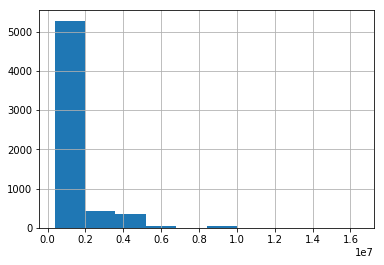

In [29]:
#describe by ignoring missing values; drop
print(market_price.describe().round())
market_price.hist()

count       14037.0
mean      1078548.0
std        889413.0
min        369000.0
25%        877000.0
50%        877000.0
75%        877000.0
max      16450000.0
Name: market_price, dtype: float64


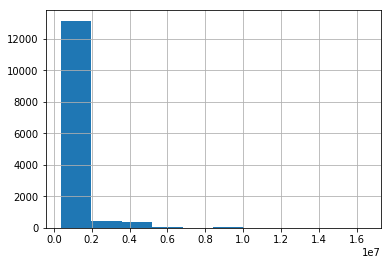

In [30]:
#describe by filling in with median; impute
print(market_price.fillna(market_price.median()).describe().round())
market_price.fillna(market_price.median()).hist()

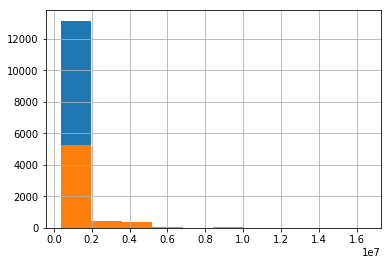

In [31]:
#comparing with and without median imputation (most common strategies are median, mode and constant)
market_price.fillna(market_price.median()).hist()
market_price.hist()

For many people, their first instinct is to either drop or impute missing values. However, dropping the values can lead to loss of information, especially if other columns are not missing, and imputation can skew the value distribution.

For exploration, we must estimate the *extent* and *assumptions* about the nature of the missing values. For instance, if we think that the values for `market_price` is just missing because of users are lazy to input, we can assume that the distribution of values after dropping missing values are close to the actual distribution. However, if we assume that more owners of more expensive cars are more lazy, we should know that the distribution is underestimating the actual distribution.

For modeling, the best practice is to create another column `col_missing` that holds the boolean value. This feature will estimate the "information value" of missing values in the specific column `col`.

**Coding Assignment** Write a function the 
* Creates a missing-value flag for each numerical column
* Impute numerical columns with median, mode or a constant
* Impute categorical columns with missing token `xxna`

In [32]:
'''
Fill in the codes
'''
def missingify(df):
    pass

In [33]:
df_m = utils.missingify(df)
df_m.head()

Index(['id', 'brand', 'series', 'model', 'gen', 'color', 'gear', 'gas',
       'description', 'contact_location', 'month_scraped', 'dow'],
      dtype='object')


,id,brand,series,model,gen,color,gear,gas,description,contact_location,...,subscribers,date_diff,year_scraped,year_missing,sales_price_missing,original_price_missing,market_price_missing,subscribers_missing,date_diff_missing,year_scraped_missing
0,2218322,BMW,SERIES 3,320 i,F30,สีขาว,เกียร์ออโต้,xxna,BMW 320i Modern ปี 2013 รถมือเดียวภายในภายนอกด...,กรุงเทพมหานคร,...,858.0,4.0,2019.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2225742,TOYOTA,VENTURY,2.7 G,ปี05-ปัจจุบัน,สีขาว,เกียร์ออโต้,LPG,ฟรีดาวนventury G ออโต้ปี2011รถสวยมากมือเดียวไม...,กรุงเทพฯ,...,137.0,4.0,2019.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2229350,BENZ,E-CLASS,E55 AMG,W211,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,E55 AMG V8 SuperCharge Tune by Zugus 500hp++ 7...,นนทบุรี,...,960.0,4.0,2019.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,2220134,HYUNDAI,GRAND STAREX,2.5 VIP,ปี10-2018,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,HYUNDAI GRAND STAREX 2.5 VIP ปี 2011\n- auto a...,จังหวัดกรุงเทพฯ,...,74.0,4.0,2019.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2218992,LANDROVER,DISCOVERY,V8 XS,DISCOVERY,สีดำ,เกียร์ออโต้,xxna,ขายLand Rover Discovery 2 ปี 2001 เบนซิน วิ่งด...,กรุงเทพมหานคร,...,60.0,4.0,2019.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Fuzzy Matching

One of the most unique problems for Thai data scientists is the way we write province names; for instance, Bangkok can be กรุงเทพ, กรุงเทพฯ, กรุงเทพมหานครฯ or กรุงเทพมหานคร. In this case, we can use [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance), basically how many times one string needs to be added, substituted, or removed to become the other string, to find if these values are actually the same values. In Python, we can use [fuzzywuzzy](https://github.com/seatgeek/fuzzywuzzy) to do this task.

In [34]:
df.contact_location.value_counts().head(10)

กรุงเทพฯ           6544
กรุงเทพมหานคร      1724
จังหวัดกรุงเทพฯ    1652
กรุงเทพ            1296
เมืองกรุงเทพฯ      1081
นนทบุรี             629
ปทุมธานี            246
ชลบุรี              176
สมุทรปราการ         133
นครปฐม               95
Name: contact_location, dtype: int64

In [35]:
from fuzzywuzzy import fuzz
fuzz.ratio('กรุงเทพมหานคร','กรุงเทพฯ')

67

In [36]:
#partial ratio calculates the max of all substring matching, so it fits better with our use case
fuzz.partial_ratio('กรุงเทพมหานคร','กรุงเทพฯ')

88

In [37]:
#we have 64 unique values so we will compute 64! times the fuzzy ratio
df.contact_location.nunique()

64

**Coding Assignment** Use `fuzzywuzzy` to create a function that returns a dictionary for fuzzy values.

In [38]:
def fuzzy_dict(df, col, fuzz_fn, th=90):
    pass

In [39]:
d = utils.fuzzy_dict(df,'contact_location',fuzz.partial_ratio,90)
d

{'กรุงเทพมหานคร': 'กรุงเทพ',
 'กรุงเทพฯ': 'กรุงเทพ',
 'นนทบุรี': 'นนทบุรี',
 'จังหวัดกรุงเทพฯ': 'กรุงเทพ',
 'เมืองกรุงเทพฯ': 'กรุงเทพ',
 'สมุทรสาคร': 'สมุทรสาคร',
 'ฉะเชิงเทรา': 'ฉะเชิงเทรา',
 'สมุทรปราการ': 'สมุทรปราการ',
 'ปทุมธานี': 'ปทุมธานี',
 'กรุงเทพ': 'กรุงเทพ',
 'ชลบุรี': 'ชลบุรี',
 'นครพนม': 'นครพนม',
 'นครปฐม': 'นครปฐม',
 'พิษณุโลก': 'พิษณุโลก',
 'สงขลา': 'สงขลา',
 'นครศรีธรรมราช': 'นครศรีธรรมราช',
 'ภูเก็ต': 'ภูเก็ต',
 'สมุทรสงคราม': 'สมุทรสงคราม',
 'สุพรรณบุรี': 'สุพรรณบุรี',
 'นครราชสีมา': 'นครราชสีมา',
 'ลำปาง': 'ลำปาง',
 'อยุธยา': 'อยุธยา',
 'เชียงราย': 'เชียงราย',
 'ขอนแก่น': 'ขอนแก่น',
 'เชียงใหม่': 'เชียงใหม่',
 'อุดรธานี': 'อุดรธานี',
 'หนองบัวลำภู': 'หนองบัวลำภู',
 'ราชบุรี': 'ราชบุรี',
 'ระยอง': 'ระยอง',
 'ลพบุรี': 'ลพบุรี',
 'สระบุรี': 'สระบุรี',
 'ชัยภูมิ': 'ชัยภูมิ',
 'ชัยนาท': 'ชัยนาท',
 'จันทบุรี': 'จันทบุรี',
 'เพชรบูรณ์': 'เพชรบูรณ์',
 'ประจวบคีรีขันธ์': 'ประจวบคีรีขันธ์',
 'อุบลราชธานี': 'อุบลราชธานี',
 'มหาสารคาม': 'มหาสารคาม',
 'กาญจนบุรี': 'กาญจนบุรี',


In [40]:
df = utils.otherify(df,'contact_location',d)
df.contact_location.value_counts().head()

กรุงเทพ        12297
นนทบุรี          629
ปทุมธานี         246
ชลบุรี           176
สมุทรปราการ      133
Name: contact_location, dtype: int64

## Categorical Value Distribution

In [41]:
def value_dist(df,col):
    pass
#return distribution of values in each column

In [42]:
utils.value_dist(df,'color')

,value,cnt,per
0,สีขาว,4207,0.299708
1,สีดำ,2848,0.202892
2,สีเทา,2740,0.195198
3,สีบรอนซ์เงิน,1879,0.133861
4,สีน้ำตาล,607,0.043243
5,สีบรอนซ์ทอง,395,0.028140
6,สีแดง,380,0.027071
7,สีน้ำเงิน,341,0.024293
8,สีฟ้า,206,0.014676
9,สีเขียว,178,0.012681


In [43]:
interact(utils.value_dist, 
         df=fixed(df.select_dtypes(exclude=[np.number])),
         col=widgets.Dropdown(options=df.select_dtypes(exclude=[np.number]).columns, 
         value='brand'))

interactive(children=(Dropdown(description='col', index=1, options=('id', 'brand', 'series', 'model', 'gen', '…

<function utils.value_dist(df, col)>

**Coding Assignment** Write a function that creates a table for mode values of all columns. The output should tell us the percentage of the mode values present in the column, what the mode is, and how many unique values there are in the column. 

After seeing this table, which columns do you think we should drop and why?

In [44]:
def check_mode(df):
    pass
#return the most popular value of each column and what is the percentage of that value

In [45]:
utils.check_mode(df.loc[:,~df.columns.str.contains('missing')])

,col,value,per_mode,nb_value
0,month_scraped,5,1.000000,1
1,year_scraped,2019,1.000000,1
2,gas,xxna,0.936525,3
3,contact_location,กรุงเทพ,0.876042,60
4,dow,2,0.825960,4
5,gear,เกียร์ออโต้,0.801952,2
6,brand,TOYOTA,0.301133,49
7,color,สีขาว,0.299708,15
8,year,2013,0.123246,40
9,gen,ปี12-ปัจจุบัน,0.058203,451


In [46]:
df = df.drop(['id','year_scraped','month_scraped'],1)

**Coding Assignment** Implement the `other_dict` to create mapping dictionaries for otherification by `otherify` function. Otherify your columns as you like.

(Hint: reuse the `value_dist` function for `other_dict`).

In [47]:
'''
Fill in the codes
'''
def other_dict(df, col, th=0.03):
    pass

def otherify(df, col, d):
    pass

In [48]:
other_cols = ['brand', 'series', 'model', 'gen', 'color', 'gear', 'gas','contact_location', 'dow']
ds = []
for col in other_cols:
    d = utils.other_dict(df,col,0.03)
    ds.append(d)
    df = utils.otherify(df,col,d)

In [49]:
interact(utils.value_dist, 
         df=fixed(df.select_dtypes(exclude=[np.number])),
         col=widgets.Dropdown(options=df.select_dtypes(exclude=[np.number]).columns, 
         value='brand'))

interactive(children=(Dropdown(description='col', options=('brand', 'series', 'model', 'gen', 'color', 'gear',…

<function utils.value_dist(df, col)>

In [50]:
df = df.drop(['model'],1)
df.to_csv('data/taladrod/taladrod.csv',index=False)

## Numerical Value Distribution

**Conceptual Assignment** Is there anything wrong about looking at the numerical value distribution this way?

In [51]:
num_df = df.loc[:,~df.columns.str.contains('missing')].select_dtypes(include=[np.number])
num_df.head()

,year,sales_price,original_price,market_price,subscribers,date_diff
0,2013.0,1090000.0,2697000.0,2697000.0,858.0,NaN
1,2009.0,489000.0,NaN,NaN,137.0,NaN
2,2004.0,999000.0,NaN,NaN,960.0,NaN
3,2011.0,839000.0,1978000.0,1978000.0,74.0,NaN
4,2001.0,655000.0,NaN,NaN,60.0,NaN


In [52]:
interact(lambda df,col: df[col].hist(bins=100), 
         df=fixed(num_df),
         col=widgets.Dropdown(options=num_df.columns, 
         value='sales_price'))

interactive(children=(Dropdown(description='col', index=1, options=('year', 'sales_price', 'original_price', '…

<function __main__.<lambda>(df, col)>